# Convolutional Neural Network

CNN is a deep learning model for different image problem. The advantage of having CCN over others is that it learns distinctive features for each class itself.

Convolutional an operation to merge input data with filter to produce a feature map.

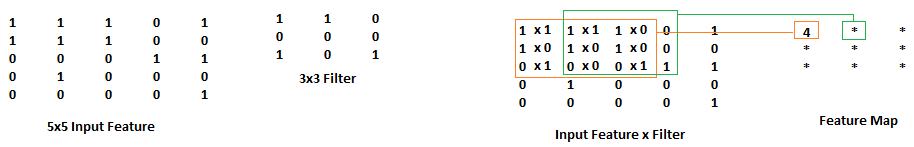

However, in covolutional operation along with width and height, their also exists depth (RBG Scale).

As it is seen in image, the feature is first imposed on red matrix to get '4' on feature map, next the feature is imposed on green matrix and so on to get the feature map. The filter is a 3x3 matrix, therefore, it is called 3x3 convolution.

Similarly, we will perform multiple convolution with using number of filters of different size to get distinct feature map and create a stack of feature map.

Note: Neural Network retain its power from non-linearity and we will use 'ReLU' activation function before producing the feature map to the weighted sum (green or red box output in image).

#### Striding
Striding specifies how much we move the filter in convolution operation. In above convolution operation we are using Striding=1, by moving one stride at the time. We use more striding if we need less overlapping between receptive fields.


#### Padding
Padding is a method to preserve the size of the feature maps in proportion to input feature size with zeros at edges (as seen in image below), else it would shrink at each layer. 

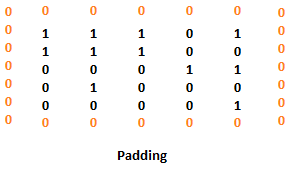

#### Pooling
Pooling is used to reduce the number of parameter for improved training time and pre-curing overfitting. The most common one is 'Max Pooling' that take the maximum in the pooling window shown below:

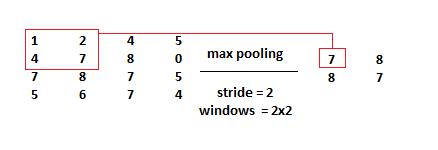

#### Regularization (Dropout)

To prevent overfitting, we use the most popular regularization technique called Dropout. The idea is to drop neuron temporarily with some propability (dropout-rate) during each training iteration, such that, the each neuron is involved in model designing and the network is not too dependent to some neurons only.

#### Fully Connected Neural Network
After pooling, we will flattern the output to a vector to be feeded to fully connected neural network and get the output layer.

#### Data Augmentation
The data augnemtation is a technique using we can increase the number of training example from our current example dataset by transformation (rotating, resizing, contrast tweaking, etc.), and we use data augmentation to prevent overfitting which is caused when we have too less training example.

#### CNN Architecture
Finally, this is how CNN architecture looks like:

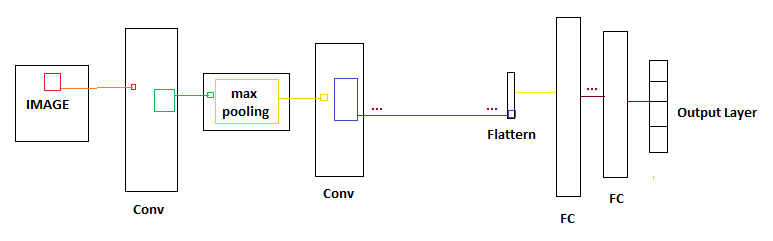

### Training

The feature extration and detection happens with convolution operation and classification happens in fully connected neural network.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

import numpy

import pickle

numpy.random.seed(7)

#### Dataset
We will use CIFAR-10 Dataset. The CIFAR-10 dataset consists of 50000 32x32 colour images in 10 classes.

NOTE: You need to download the dataset from above https://www.cs.toronto.edu/~kriz/cifar.html and keep it in the same directory where this code relies.

In [ ]:
#function for extracting data from cPickle file
def unpickle(file):
    with open(file, 'rb') as f:
        data = pickle.load(f, encoding='latin-1')
    return data

##function to load and split CIFAR-10 dataset into training and testing samples
def load_cifar10_data(DIR_PATH):
    y_train = []
    for i in range(1, 6):
        train_data_dict = unpickle(DIR_PATH + "/data_batch_{}".format(i))
        if i == 1:
            x_train = train_data_dict['data']
        else:
            x_train = numpy.vstack((x_train, train_data_dict['data']))
            y_train += train_data_dict['labels']

    test_data_dict = unpickle(DIR_PATH + "/test_batch")
    x_test = test_data_dict['data']
    y_test = test_data_dict['labels']

    return x_train, y_train, x_test, y_test

#### Prepare Data

In [ ]:
x_train, y_train, x_test, y_test = load_cifar10_data("cifar-10-batches-py")

num_classes = 10
rbg_channel = 3
dimention_x, dimention_y = 32, 32

x_train = x_train.reshape(x_train.shape[0], dimention_x, dimention_y, rbg_channel)
x_test = x_test.reshape(x_test.shape[0], dimention_x, dimention_y, rbg_channel)
input_shape = (dimention_x, dimention_y, rbg_channel)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Training Sample:", x_train.shape,
        "Training Label: ", y_train.shape)
print("Testing Sample: ", x_test.shape,
        "Testing Label: ", y_test.shape)

##The dataset contains 50k x_train and 40k y_train data, so we need to equalize.
x_train = x_train[0:40000]

#### Hyper-Parameters

In [ ]:
epochs = 25
learning_rate = 0.01
decay_rate = learning_rate/epochs

#### CNN Model Design

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

optimizer = SGD(lr=learning_rate, momentum=0.9, decay_rate=decay_rate, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#uncomment line below to visualize complete model design
#print(model.summary())

#### Training

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=32)

scores = model.evaluate(x_test, y_test, verbose=0)
print("LOSS: ", scores[0], " | ACCURACY: ", (scores[1]*100))

The above CNN model performs poor, but does explain how CNN rolls.

To improve, add more convolution layer and tweak hyper-parameters.
Use Pattern: Conv2D()->Dropout()->Conv2D()->MaxPooling2D()->... Flattern() ...Dropout()->Dens()->...